# MERCARI PRICE SUGGESTION CHALLENGE 

In [ ]:
# Mercari is a Japanese retailer, an online two-sided marketplace that allows sellers to easily sell, ship, and earn money for used items.
# Mercari would like to offer pricing suggestions to sellers, but this is tough because sellers are enabled to put just about anything,
# on Mercari's marketplace. The idea is to build a model that automatically suggests the right product prices based on attributes.
# The objective is to gain a better understanding of price influencers for used products.


In [ ]:
import pandas as pd
train = pd.read_csv("mercari_train_new.csv")
test = pd.read_csv("mercari_test_new.csv")
test=test.drop("price",axis=1)
train_copy=train.copy()

In [2]:
# check the length of data
print(train.shape[0])
print(test.shape[0])

60000
60000


In [3]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,1,Small Workout Set Leggins Tights Crop,2,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,0,This listing is for a small workout set: - one...
1,2,Lululemon Athletica Tank Size S,3,"Women/Tops & Blouses/Tank, Cami",Lululemon,0,Lululemon Athletica Tank Size S
2,3,New flashcards,1,Other/Books/Education & Teaching,NaN,0,Brand new in package. Multiplication and divis...
3,4,3 pairs of 4T Disney pjs,3,Kids/Girls 2T-5T/Other,Disney,0,3 pairs of size 4T Disney 2 piece pajamas. Sof...
4,5,20 piece lashes,1,Beauty/Makeup/Eyes,NaN,1,Total of 20 piece lashes 10 long dramatic lash...


In [4]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
1,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
2,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
3,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
4,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."


In [5]:
# define function to clean the category column to create main category and sub categories
def split_x(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label") 

In [6]:
# Splitting category name into: Main Category, SubCategory_1, SubCategory_2
train_copy['main_category'], train_copy['subcat_1'], train_copy['subcat_2'] = zip(*train_copy['category_name'].apply(lambda x: split_x(x)))

In [7]:
train_copy.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2
0,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
1,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
2,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
3,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
4,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Other,Other


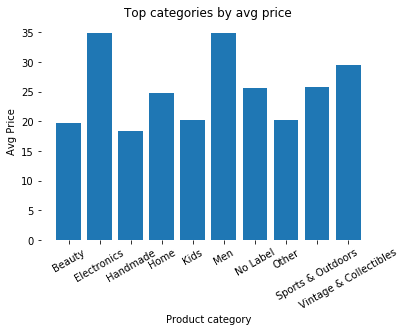

In [10]:
# top categories by price
import matplotlib.pyplot as plt
new_df=pd.DataFrame(train_copy.groupby('main_category').price.mean()[0:10]).reset_index()
plt.bar(new_df["main_category"],new_df["price"])
plt.xticks(rotation=30)
plt.xlabel("Product category")
plt.ylabel("Avg Price")
plt.title("Top categories by avg price")
plt.box(on=None)

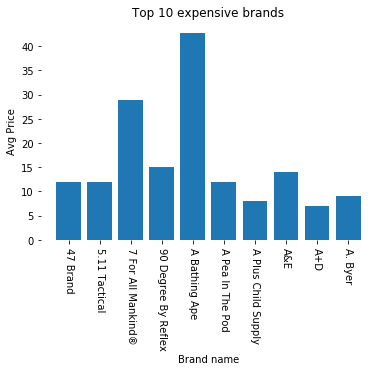

In [12]:
# top brands by price
brands=pd.DataFrame(train_copy.groupby('brand_name').price.mean()[0:10]).reset_index()
plt.bar(brands["brand_name"],brands["price"])
plt.xticks(rotation=-90)
plt.xlabel("Brand name")
plt.ylabel("Avg Price")
plt.title("Top 10 expensive brands")
plt.box(on=None)

In [19]:
train_copy.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description     False
main_category        False
subcat_1             False
subcat_2             False
dtype: bool

In [13]:
# fill missing values in category, brand name, item description, price columns
def cleaning(dataset):
    dataset.category_name.fillna(value = "Other/Other/Other", inplace = True)
    dataset.brand_name.fillna(value = "Unknown brand", inplace = True)
    dataset.item_description.fillna(value = "No description", inplace = True)
    dataset.price.fillna(value=0,inplace=True)
    print("missing values replaced in the dataset")

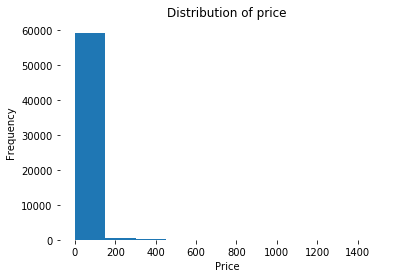

In [17]:
# see the distribution of price (target variable)
import matplotlib.pyplot as plt
plt.hist(train_copy["price"])
plt.xlabel("Price", fontsize = 10)
plt.ylabel("Frequency ", fontsize = 10)
plt.title("Distribution of price")
plt.box(on=None)
plt.show()

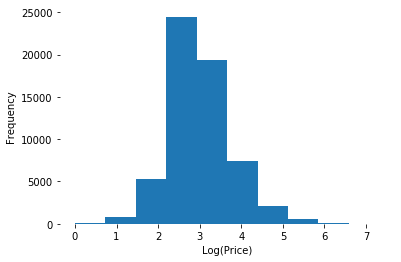

In [18]:
# price has a right skewed distribution 
# log transform price variable
import numpy as np
train_copy['price'] = np.log1p(train_copy['price'])
plt.hist(train_copy.price)
plt.xlabel("Log(Price)", fontsize = 10)
plt.ylabel("Frequency ", fontsize = 10)
plt.box(on=None)

Text(0.5, 0.98, ' Correlations Heat Map for attributes')

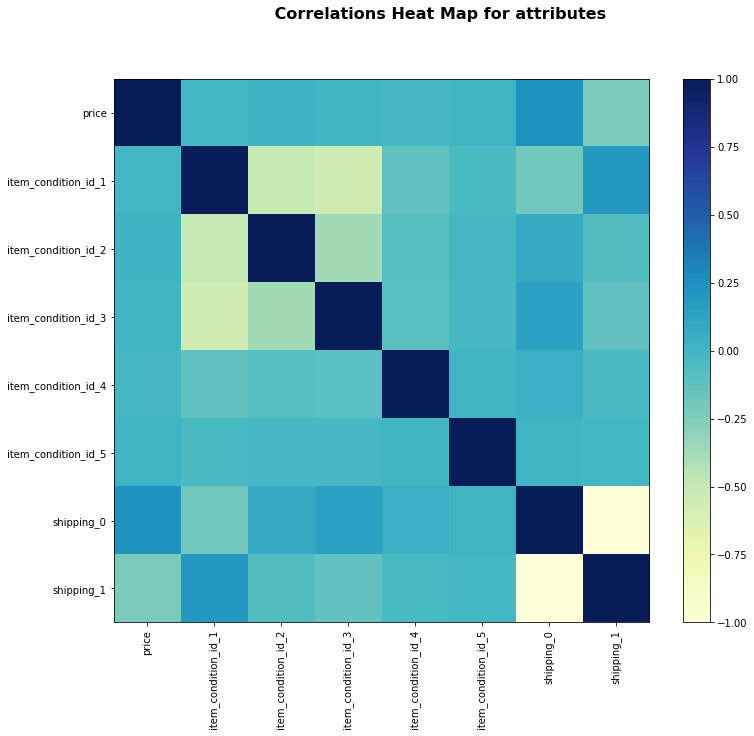

In [29]:
corr_data=train_copy[["shipping","item_condition_id","price"]]
df = pd.get_dummies(corr_data, columns=['item_condition_id'])
df1 = pd.get_dummies(df, columns=['shipping'])
df1.head()
table1=df1.corr()
plt.figure(figsize=(12, 10))
plt.imshow(table1, cmap='YlGnBu', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(table1)), table1.columns, rotation='vertical')
plt.yticks(range(len(table1)), table1.columns);
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')

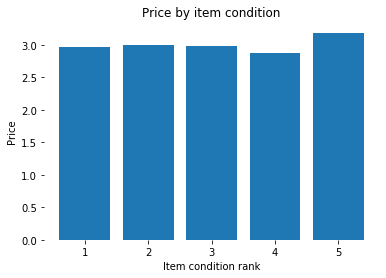

In [38]:
items=train_copy.groupby("item_condition_id").price.mean().reset_index()
plt.bar(items["item_condition_id"],items["price"])
plt.xlabel("Item condition rank", fontsize = 10)
plt.ylabel("Price", fontsize = 10)
plt.title("Price by item condition")
plt.box(on=None)
plt.show()

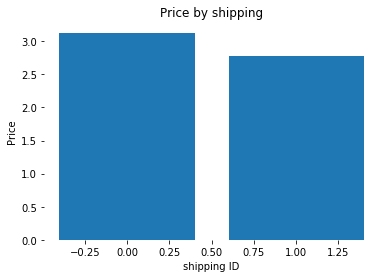

In [40]:
shipping=train_copy.groupby("shipping").price.mean().reset_index()
plt.bar(shipping["shipping"],shipping["price"])
plt.xlabel("shipping ID", fontsize = 10)
plt.ylabel("Price", fontsize = 10)
plt.title("Price by shipping")
plt.box(on=None)
plt.show()

In [43]:
# merge the train and test data sets
merged_data = pd.concat([train,test])
merged_data.isnull().any()

train_id              True
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                 True
shipping             False
item_description     False
test_id               True
dtype: bool

In [44]:
# clean the merged dataframe - fill missing values
cleaning(merged_data)

missing values replaced in the dataset


In [ ]:
# apply the split function to split category name into different sub-categories
merged_data['main_category'], merged_data['subcat_1'], merged_data['subcat_2'] = zip(*merged_data['category_name'].apply(lambda x: split_x(x)))

In [45]:
# define size of training set
nrow = len(train)
nrow

60000

In [46]:
# remove punctuation
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
# create function to remove punctuations from input string
import string
def rmv_punct(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

In [48]:
# define function to remove numbers 
def rmv_numbers(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

In [49]:
# create a corpus and remove stop words
from nltk.corpus import stopwords
words = stopwords.words('english')
def rmv_stop_words(x):
    x = ' '.join([i.lower() for i in x.split(' ') if i not in words])
    return x

In [51]:
merged_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,test_id,main_category,subcat_1,subcat_2
0,1.0,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,NaN,Electronics,Computers & Tablets,Components & Parts
1,2.0,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,NaN,Women,Tops & Blouses,Blouse
2,3.0,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Unknown brand,35.0,1,New with tags. Leather horses. Retail for [rm]...,NaN,Home,Home Décor,Home Décor Accents
3,4.0,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Unknown brand,44.0,0,Complete with certificate of authenticity,NaN,Women,Jewelry,Necklaces
4,5.0,Bundled items requested for Ruie,3,Women/Other/Other,Unknown brand,59.0,0,"Banana republic bottoms, Candies skirt with ma...",NaN,Women,Other,Other


In [52]:
merged_data["subcat_1"].value_counts()

Athletic Apparel         10837
Makeup                   10168
Tops & Blouses            8522
Shoes                     8207
Jewelry                   5040
                         ...  
Suits                        8
Blazers & Sport Coats        5
Candles                      4
Books and Zines              4
Dolls and Miniatures         2
Name: subcat_1, Length: 111, dtype: int64

In [55]:
# extract the description column from the merged_data for stemming
merged_data.item_description = merged_data.item_description.astype(str)
descr = merged_data[['name','item_description', 'price']]
descr['count'] = descr['item_description'].apply(lambda x : len(str(x)))
descr['item_description'] = descr['item_description'].apply(rmv_numbers)
descr['item_description'] = descr['item_description'].apply(rmv_punct)
descr['item_description'] = descr['item_description'].apply(rmv_stop_words)
descr['name'] = descr['name'].apply(rmv_numbers)
descr['name'] = descr['name'].apply(rmv_punct)
descr['name'] = descr['name'].apply(rmv_stop_words)
descr.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,name,item_description,price,count
0,razer blackwidow chroma keyboard,this keyboard great condition works like came ...,52.0,188
1,avaviv blouse,adorable top hint lace key hole back the pale ...,10.0,124
2,leather horse statues,new tags leather horses retail rm stand foot h...,35.0,173
3,k gold plated rose,complete certificate authenticity,44.0,41
4,bundled items requested ruie,banana republic bottoms candies skirt matching...,59.0,102


In [56]:
# STEMMING: use porterstemmer to stem the words within description
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
descr['item_description'] = descr['item_description'].apply(porter.stem)
descr['name'] = descr['name'].apply(porter.stem)
descr.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,name,item_description,price,count
0,razer blackwidow chroma keyboard,this keyboard great condition works like came ...,52.0,188
1,avaviv blous,adorable top hint lace key hole back the pale ...,10.0,124
2,leather horse statu,new tags leather horses retail rm stand foot h...,35.0,173
3,k gold plated ros,complete certificate authent,44.0,41
4,bundled items requested rui,banana republic bottoms candies skirt matching...,59.0,102


In [57]:
# final check for missing values
merged_data.isnull().any()

train_id              True
name                 False
item_condition_id    False
category_name        False
brand_name           False
price                False
shipping             False
item_description     False
test_id               True
main_category        False
subcat_1             False
subcat_2             False
dtype: bool

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [64]:
descr["name"][0:5]

0    razer blackwidow chroma keyboard
1                        avaviv blous
2                 leather horse statu
3                   k gold plated ros
4         bundled items requested rui
Name: name, dtype: object

In [66]:
# Feature extraction and transformation
# Apply Count Vectorizer to "name", this converts it into a sparse matrix of counts
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_name = tv.fit_transform(descr['name'])

In [90]:
# Apply Count Vectorizer to "category_name", this converts it into a sparse matrix of category word counts
cv = CountVectorizer()
X_category = cv.fit_transform(merged_data['category_name'])

  (0, 263)	1
  (0, 189)	1
  (0, 759)	1
  (0, 188)	1
  (0, 534)	1
  (1, 864)	1
  (1, 795)	1
  (1, 81)	1
  (1, 80)	1
  (2, 371)	3
  (2, 255)	2
  (2, 7)	1


In [68]:
# Apply TFIDF to "item_description", this converts item descriptions into frequency counts using tfidf 
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(descr['item_description'])

In [69]:
# Apply LabelBinarizer to "brand_name", converts brand names into discreet codes
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(merged_data['brand_name'])

In [70]:
# create dummy variables for item condition and shipping columns
from scipy.sparse import vstack, hstack, csr_matrix
X_dummies = csr_matrix(pd.get_dummies(merged_data[['item_condition_id', 'shipping']], sparse=True).values)

In [71]:
# merge the matrices to create a csr matrix
mercari_final = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()

In [72]:
# split the data into test and train sets
nrow=len(train)
X_train_sparse = mercari_final[:nrow]
X_test = mercari_final[nrow:]
y_train = np.log1p(train["price"])
print(X_train_sparse.shape)
print(X_test.shape)
print(y_train.shape)

(60000, 113099)
(60000, 113099)
(60000,)


In [96]:
# Model 1: RIDGE REGRESSION
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
model = Ridge(solver = "lsqr", fit_intercept=False)

In [97]:
# Train the model using training data
model.fit(X_train_sparse, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [98]:
# Make predictions using RIDGE regression
predictions = model.predict(X_test)
predictions

array([2.97823108, 3.1437732 , 3.05791266, ..., 3.64640855, 3.73403854,
       3.46138198])

In [99]:
# take a inverse of the log on predictions to get actual prices
ridge_predictions=np.expm1(predictions)
ridge_predictions

array([18.6530213 , 22.19120708, 20.28308571, ..., 37.33673391,
       40.84777114, 30.86097738])

In [100]:
# Model 2 : LGBM regressor
import lightgbm as lgb
model2 = lgb.LGBMRegressor()

In [101]:
print("Fitting Model -------------------------------------")
model2.fit(X_train_sparse, y_train)

Fitting Model -------------------------------------


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [102]:
# Make predcitions using LGBM regressor
predictions2 = model2.predict(X_test)
predictions2

array([3.23610769, 3.11793449, 2.92292175, ..., 3.68514774, 3.37059794,
       3.45948237])

In [103]:
# make predictions using LGBM regressor
LGBM_preds=np.expm1(predictions2)
LGBM_preds

array([24.43452978, 21.59965153, 17.59553963, ..., 38.85100976,
       28.09591945, 30.80051136])

In [104]:
# Model 2: LGBM with parameter tuning
params = {
    'learning_rate': 0.15,
    'application': 'regression',
    'max_depth': 13,
    'num_leaves': 400,
    'verbosity': -1,
    'data_random_seed': 1,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.6,
    'nthread': 4,
    'lambda_l1': 10,
    'lambda_l2': 10
}
mercari_model = lgb.train(params, train_set=lgb.Dataset(X_train_sparse, y_train), num_boost_round=1800,  \
    verbose_eval=100) 

In [105]:
# make predictions using the ne LGBM model with custom parameters
predictions3 = mercari_model.predict(X_test)
LGBM2_prices=np.expm1(predictions3)

In [106]:
LGBM2_prices

array([26.06626578, 23.64275297, 16.91856795, ..., 47.36642394,
       24.51863093, 37.74260783])

In [107]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
real_prices=pd.read_csv("mercari_test_new.csv")["price"]
MSE_RIDGE = mean_squared_log_error(real_prices,ridge_predictions)
MSE_LGBM= mean_squared_log_error(real_prices,LGBM_preds)
MSE_LGBM_withParams= mean_squared_log_error(real_prices,LGBM2_prices)

In [108]:
test['main_category'], test['subcat_1'], test['subcat_2'] = zip(*test['category_name'].apply(lambda x: split_x(x)))

In [109]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description,main_category,subcat_1,subcat_2
0,1,Small Workout Set Leggins Tights Crop,2,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,0,This listing is for a small workout set: - one...,Women,Athletic Apparel,"Pants, Tights, Leggings"
1,2,Lululemon Athletica Tank Size S,3,"Women/Tops & Blouses/Tank, Cami",Lululemon,0,Lululemon Athletica Tank Size S,Women,Tops & Blouses,"Tank, Cami"
2,3,New flashcards,1,Other/Books/Education & Teaching,NaN,0,Brand new in package. Multiplication and divis...,Other,Books,Education & Teaching
3,4,3 pairs of 4T Disney pjs,3,Kids/Girls 2T-5T/Other,Disney,0,3 pairs of size 4T Disney 2 piece pajamas. Sof...,Kids,Girls 2T-5T,Other
4,5,20 piece lashes,1,Beauty/Makeup/Eyes,NaN,1,Total of 20 piece lashes 10 long dramatic lash...,Beauty,Makeup,Eyes


In [110]:
# comparison of predictions from the models
prices=test[["test_id","name","brand_name","main_category"]]
#prices["RIDGE_prices"]=ridge_predictions
#prices["LGBM_prices"]=LGBM_preds
prices["LGBM2_predictions"]=LGBM2_prices
prices["Actual_prices"]=real_prices
pd.options.display.float_format = '{:,.2f}'.format
prices.head(n=10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,test_id,name,brand_name,main_category,LGBM2_predictions,Actual_prices
0,1,Small Workout Set Leggins Tights Crop,NaN,Women,26.07,10.00
1,2,Lululemon Athletica Tank Size S,Lululemon,Women,23.64,14.00
2,3,New flashcards,NaN,Other,16.92,11.00
3,4,3 pairs of 4T Disney pjs,Disney,Kids,14.52,11.00
4,5,20 piece lashes,NaN,Beauty,10.51,18.00
5,6,iPhone 6/6S clear crystal hard back case,NaN,Electronics,8.87,8.00
6,7,NWT LULAROE OS GEOMETRIC *UNICORN*,NaN,Women,38.67,35.00
7,8,LuLaRoe OS legging euc,LuLaRoe,Women,26.13,22.00
8,9,Merona polka dot blouse,Merona,Women,10.98,8.00
9,10,2008-09 Fleer Michael Jordan insert,NBA,Vintage & Collectibles,5.73,3.00


In [111]:
# Root mean squared log error of the models
# Target RMSLE = 0.30
print("MSE from Model 1- Ridge regression: " + str(round(MSE_RIDGE,4)))
print("MSE from Model 2- LGBM Regressor : " + str(round(MSE_LGBM,4)))
print("MSE from Model 3- LGBM Regressor with params : " + str(round(MSE_LGBM_withParams,4)))

MSE from Model 1- Ridge regression: 0.2789
MSE from Model 2- LGBM Regressor : 0.3008
MSE from Model 3- LGBM Regressor with params : 0.2765
